In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pennylane as qml

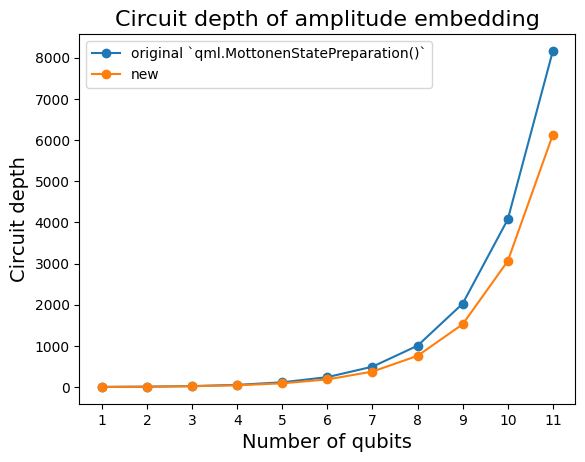

In [2]:
import opt

original_depth = []
new_depth = []
nq_list = list(range(1, 12))

for num_qubits in nq_list:
    dev = qml.device("lightning.qubit", wires=num_qubits)

    state = np.random.rand(2**num_qubits) + 1j * np.random.rand(2**num_qubits)
    state = state / np.linalg.norm(state)

    @qml.qnode(dev, expansion_strategy="device")
    def circuit_original(state):
        qml.MottonenStatePreparation(state, wires=range(num_qubits))
        return qml.state()

    specs_func = qml.specs(circuit_original)

    original_depth.append(specs_func(state)["resources"].depth)

    @qml.qnode(dev, expansion_strategy="device")
    def circuit_new(state):
        opt.amplitude_embedding(state, range(num_qubits))
        return qml.state()

    specs_func = qml.specs(circuit_new)

    new_depth.append(specs_func(state)["resources"].depth)


plt.plot(
    nq_list,
    original_depth,
    label="original `qml.MottonenStatePreparation()`",
    marker="o",
)
plt.plot(nq_list, new_depth, label="new", marker="o")
plt.legend()
plt.title("Circuit depth of amplitude embedding", fontsize=16)
plt.xlabel("Number of qubits", fontsize=14)
plt.ylabel("Circuit depth", fontsize=14)
plt.xticks(nq_list)
plt.show()

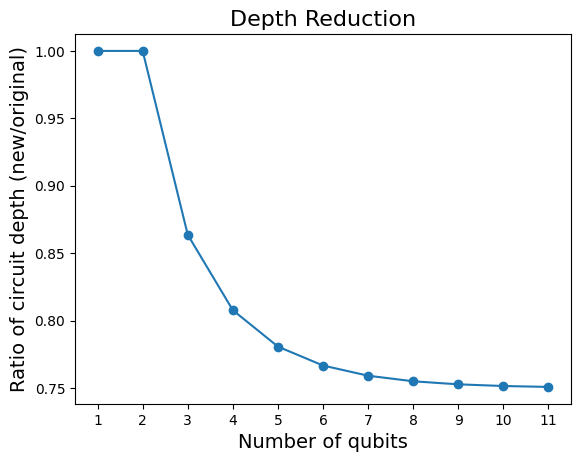

In [3]:
original_depth = np.array(original_depth)
new_depth = np.array(new_depth)

plt.plot(nq_list, new_depth / original_depth, marker="o")
plt.title("Depth Reduction", fontsize=16)
plt.xlabel("Number of qubits", fontsize=14)
plt.ylabel("Ratio of circuit depth (new/original)", fontsize=14)
plt.xticks(nq_list)
plt.show()